# Ridge Regression. 

## Theory
1. Обозначения

    $a=\left( {{a}_{1}}\text{ }...\text{  }{{a}_{l}} \right)$ - вектор прогнозов модели

    $y=\left( {{y}_{1}}\text{ }...\text{  }{{y}_{l}} \right)$ - вектор ответов

    $X=\left( \begin{align}
     & 1\text{  }{{x}_{11}}\text{ }....\text{  }{{x}_{1d}} \\ 
     & 1\text{      }....... \\ 
     & 1\text{      }....... \\
     & 1\text{  }{{x}_{l1}}\text{ }....\text{   }{{x}_{ld}} \\ 
    \end{align} \right)$ - матрица признаков

    $w=\left( \begin{align}
     & {{w}_{0}} \\ 
     & {{w}_{1}} \\ 
     & ... \\ 
     & {{w}_{d}} \\ 
    \end{align} \right)$ - матрица весов

    $a=Xw=np.dot(X,w)$ - прогноз

    $Q(w,X)=\frac{1}{2l}||Xw-y|{{|}^{2}}+\frac{\lambda }{2}||w|{{|}^{2}}$   - функция ошибки


2. Стандартизация

    ${{\mu }_{j}}=\frac{1}{l}\sum\limits_{i=1}^{l}{x_{i}^{j}}$

    ${{\mu }}=np.mean(X, axis=0)$

    ${{\sigma }_{j}}=\sqrt{\frac{1}{l}\sum\limits_{i=1}^{l}{{{\left( x_{i}^{j}-{{\mu }_{j}} \right)}^{2}}}}$
    
    ${\sigma }=np.std(X, axis=0)$
    
    $X:=\frac{X-{{\mu }}}{{\sigma }}$
    
    
3. Оптимизация

    $Q(w,X)\to \min$
    
    $\frac{\partial Q}{\partial w}=\frac{1}{l}\left( a-y \right)\cdot \frac{\partial a}{\partial w}+\lambda w=\frac{1}{l}\left( a-y \right)X+\lambda w$
 
    $w:=w-\alpha \frac{\partial Q}{\partial w}$
    
    
4. Аналитическое решение

    $\begin{align}
      & Q=||Xw-y|{{|}^{2}}+\lambda ||w|{{|}^{2}}\to \min  \\ 
      & Q={{\left( Xw-y \right)}^{T}}\left( Xw-y \right)+\lambda {{w}^{T}}w \\ 
      & \frac{\partial Q}{\partial w}={{X}^{T}}\left( Xw-y \right)+\lambda w=0 \\ 
      & {{X}^{T}}Xw-{{X}^{T}}y+\lambda w=0 \\ 
      & w={{\left( {{X}^{T}}X+\lambda I \right)}^{-1}}{{X}^{T}}y \\ 
    \end{align}$

    

## Practice

### 1) Import libs and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random

from sklearn.datasets import load_boston
from matplotlib import pyplot as plt

boston_dataset = load_boston()
sns.set()

### 2) Create matrix of features and target vector. Append constant feature

In [2]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.insert(0, '__constant', 1)
boston.head()

,__constant,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
X = boston.values
y = boston_dataset.target

### 3) Train/dev/test split

In [4]:
def train_dev_test_split(X, y, shuffle=True, train_size=0.7, dev_size=0.2):
    """
    Splits given arrays of X and y on three parts.
    Arguments:
        X - np.array of features, X.shape = (N, nx)
        y - np.array of target, y.shape = (N, 1)
        N - number of samples
    Returns:
        [X_train, y_train], [X_dev, y_dev], [X_test, y_test]
    """
    
    N, nx = X.shape
    
    
    assert y.shape[0] == N, "X and y arrays have different number of samples"
    assert train_size + dev_size <= 1.0, "Bad size of sets"
    
    idx = np.array(range(N))
    if shuffle:
        random.shuffle(idx)
    
    idx_train = idx[0: int(train_size*N)]
    idx_dev = idx[int(train_size*N): int((train_size + dev_size)*N)]
    idx_test = idx[int((train_size + dev_size)*N):]
    
    
    X_train, y_train = X[idx_train], y[idx_train]
    X_dev, y_dev = X[idx_dev], y[idx_dev]  
    X_test, y_test = X[idx_test], y[idx_test]
    
    return [X_train, y_train], [X_dev, y_dev], [X_test, y_test]

### 4) Standartization

In [23]:
def standart_scaler(X_train, X_dev, X_test):
    """
    Scales arrays based on train set with Standart_Scale.
    Arguments:
        X_train, X_dev, X_test - np.arrays
    Returns:
        X_train_scale, X_dev_scale, X_test_scale - np.arrays
    """
    
    mu = np.mean(X_train, axis=0)
    sigma = np.std(X_train, axis=0)
    sigma = np.where(sigma==0, 1, sigma)    # replace std=0 on 1
    
    X_train_scale = (X_train - mu) / sigma
    X_dev_scale = (X_dev - mu) / sigma
    X_test_scale = (X_test - mu) / sigma
    
    return X_train_scale, X_dev_scale, X_test_scale

### 5) Weight initialization

In [24]:
def init_weights(nx):
    """
    Initialize weight with random numbers.
    Arguments:
        nx - int, X.shape = (N, nx) 
    Returns:
        w - np.array
    """
    
    w = 100*np.random.random(nx)
    
    return w

### 6) Loss function

In [25]:
def ridge_loss(X_train, y_train, w, lamda=1.0):
    
    N = X_train.shape[0]
    A = np.dot(X_train, w)
    
    Q = 1/(2*N)*np.sum((A - y_train)**2) + lamda/2*np.sum(w**2)
    
    dw = 1/N*np.dot((A - y_train), X_train) + lamda*w
    
    return Q, dw

### 7) Optimization

In [28]:
def update_weights(w, dw, learning_rate=0.01):
    return w - learning_rate*dw

def predict(X, w):
    A = np.dot(X, w)
    return A

def ridge_model(X, y, n_iter=10000):
    
    # Split data
    [X_train, y_train], [X_dev, y_dev], [X_test, y_test] = train_dev_test_split(X, y)
    
    # Scale data
    X_train_scale, X_dev_scale, X_test_scale = standart_scaler(X_train, X_dev, X_test)
    
    # Number of features
    nx = X_train_scale.shape[1]
    
    # Init weights
    w = init_weights(nx)
    
    # Init list with loss
    Q_iter = []
    
    # Learning
    for _ in range(n_iter):
        Q, dw = ridge_loss(X_train_scale, y_train, w)
        
        Q_iter.append(Q)
        
        w = update_weights(w, dw)
    
    # Prediction
    y_dev_pred = predict(X_dev_scale, w)
        
    return Q_iter, w, y_dev_pred, y_dev

In [29]:
def plot_loss(q_iter):
    
    iterations = list(range(len(q_iter)))
    
    plt.figure(figsize=(12,6))
    plt.title('Loss function')
    
    plt.plot(iterations, q_iter, 'r--', label='loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    

### 8) Learning and prediction

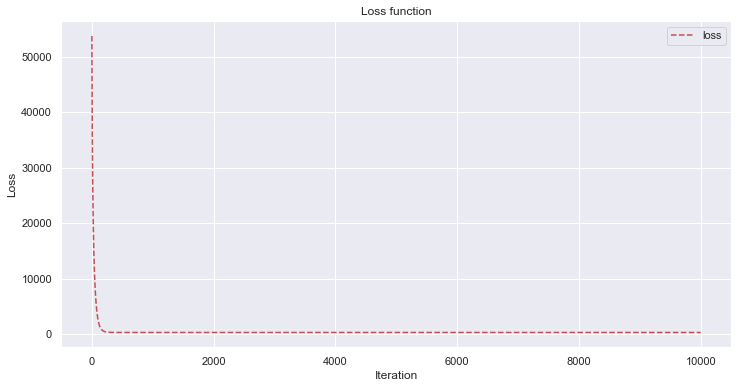

In [32]:
Q_iter, w, y_dev_pred, y_dev = ridge_model(X, y)
plot_loss(Q_iter)

### 8) Prediction

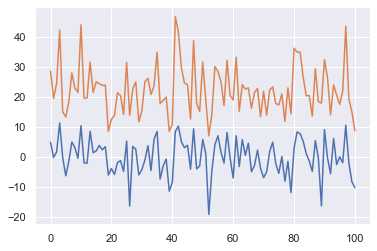

In [31]:
x = list(range(len(y_dev_pred)))
plt.plot(x, y_dev_pred)
plt.plot(x, y_dev)
plt.show()